In [1]:
import uproot
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas
import math

In [2]:
tree = uproot.open('./data/output.root')['eventless']['tree']
tracks_df = tree.pandas.df(["pdg_b", "p_b", "px_b", "py_b", "pz_b"])

In [3]:
tracks_df['vertical_angle'] = np.arcsin(tracks_df['py_b']/tracks_df['p_b'])
tracks_df['horizontal_angle'] = np.arctan(tracks_df['px_b']/tracks_df['pz_b'])
v_angle = tracks_df[tracks_df.pdg_b == 2112].vertical_angle.values
h_angle = tracks_df[tracks_df.pdg_b == 2112].horizontal_angle.values

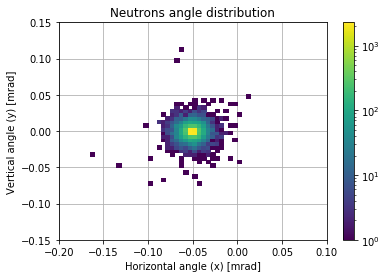

In [4]:
fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(h_angle, v_angle,
    bins=[np.arange(-200,101,5)/1000,np.arange(-150,151,5)/1000],
    norm=matplotlib.colors.LogNorm())
plt.colorbar(im, ax=ax)
plt.xlabel('Horizontal angle (x) [mrad]')
plt.ylabel('Vertical angle (y) [mrad]')
plt.title('Neutrons angle distribution')
ax.set_axisbelow(True)
plt.grid(True)
plt.show()